In [159]:
from torch.utils.data import Dataset
from PIL import Image
import numpy as np
from typing import List,Tuple
import torch

In [200]:
def flatten(func):
    """flats a nested list to a normal list if the sublists have the lenght of 1"""
    def wrapper(*args):
        nested_list = func(*args)
        if isinstance(nested_list[0], list) and len(nested_list[0]) == 1:
            return [elm for sublist in nested_list for elm in sublist]
        return nested_list
    return wrapper



class CUBDataset(Dataset):
    def __init__(self, seq_size: int = 3, root: str = "datasets/CUB_200_2011/"):
        self.seq_size = seq_size
        self.root = root
        self.filepath = "images/"
        images = self._read_file("images.txt")
        labels = self._read_file("image_class_labels.txt", True)
        train_test = self._read_file("train_test_split.txt", True)
        bounding_boxes = self._read_file("bounding_boxes.txt", True)
        bounding_boxes = [[bb[1],bb[1]+bb[3],bb[0],bb[0]+bb[2]] for bb in bounding_boxes]
        # check if all lists have the same lenght.
   #     assert all(len(images) == len(l) for l in [labels, train_test, bounding_boxes])
        
        self.train = np.array([[img, bb, label] for img, x, bb, label in zip(images, train_test, bounding_boxes,labels) if x])
        self.test = np.array([[img, bb, label] for img, x, bb, label in zip(images, train_test, bounding_boxes, labels) if not x])
        
        
        
        # check if training and test data is a smaller subset of the dataset.
   #     assert all(len(images) > len(l) for l in [self.train, self.test])
        
        #TODO add image usage
        
        
    @flatten
    def _read_file(self, file: str, as_int: bool = False):
        data = [line.split()[1:] for line in open(self.root + file)]
        if as_int:
            data = [[int(float(elm)) for elm in sublist] for sublist in data]
        return data
    
    
    def __len__(self):
        return len(set(self.train[:,-1]) & set(self.test[:,-1]))
    
    
    def __getitem__(self,idx):
        idx += 1
        train_data = self._load_Image(self.train[np.where(self.train[:,-1] == idx)][:,:-1])
        x = train_data
        y = idx
        return x, y
    
    def _load_Image(self,data: List[Tuple[str,List[int]]]):
        for img,box in data:
             return np.array(Image.open(self.root + self.filepath + img))[box[0]:box[1],box[2]:box[3]] 
            

In [201]:
from torch.utils.data import DataLoader

In [202]:
cub = CUBDataset()

In [203]:
loader = DataLoader(dataset=cub, batch_size=2)

In [204]:
cub[1]

(array([[[ 76,  74,  75],
         [ 44,  44,  42],
         [ 88,  89,  83],
         ...,
         [ 55,  58,  49],
         [ 61,  64,  53],
         [ 60,  71,  57]],
 
        [[ 80,  80,  78],
         [ 79,  84,  78],
         [ 66,  72,  62],
         ...,
         [ 56,  62,  50],
         [ 57,  63,  49],
         [ 55,  66,  50]],
 
        [[ 69,  71,  70],
         [ 91,  93,  88],
         [ 14,  17,   8],
         ...,
         [ 53,  59,  45],
         [ 55,  62,  46],
         [ 56,  69,  52]],
 
        ...,
 
        [[ 78,  94,  68],
         [ 70,  90,  62],
         [ 63,  80,  61],
         ...,
         [ 49,  68,  46],
         [ 46,  63,  44],
         [ 44,  58,  41]],
 
        [[ 90, 104,  81],
         [ 75,  99,  77],
         [ 62,  87,  65],
         ...,
         [ 51,  68,  49],
         [ 46,  63,  45],
         [ 21,  33,  19]],
 
        [[ 90,  94,  77],
         [ 97, 111,  98],
         [ 70,  85,  66],
         ...,
         [ 57,  72,  53],
  

In [206]:
for x,y in loader:
    print(y)

RuntimeError: stack expects each tensor to be equal size, but got [264, 153, 3] at entry 0 and [340, 164, 3] at entry 1

In [161]:
torch.tensor(m)

tensor([[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 4,  4,  4],
         ...,
         [ 4,  4,  4],
         [ 1,  1,  1],
         [ 2,  2,  2]],

        [[ 1,  1,  1],
         [ 1,  1,  1],
         [ 5,  5,  5],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 5,  5,  3],
         [ 0,  0,  0],
         [75, 75, 73],
         ...,
         [75, 75, 75],
         [ 1,  1,  1],
         [ 2,  2,  2]],

        ...,

        [[ 4,  4,  4],
         [ 0,  0,  0],
         [76, 76, 76],
         ...,
         [74, 74, 74],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  4],
         [ 2,  1,  6],
         [ 1,  0,  5],
         ...,
         [ 0,  0,  0],
         [ 3,  3,  3],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 1,  1,  1],
         [ 2,  2,  2],
         ...,
         [ 2,  2,  2],
         [ 1,  1,  1],
         [ 0,  0,  0]]], dtype=torch.uint8)

In [160]:
m

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 4,  4,  4],
        ...,
        [ 4,  4,  4],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 5,  5,  5],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 5,  5,  3],
        [ 0,  0,  0],
        [75, 75, 73],
        ...,
        [75, 75, 75],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       ...,

       [[ 4,  4,  4],
        [ 0,  0,  0],
        [76, 76, 76],
        ...,
        [74, 74, 74],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  4],
        [ 2,  1,  6],
        [ 1,  0,  5],
        ...,
        [ 0,  0,  0],
        [ 3,  3,  3],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 1,  1,  1],
        [ 2,  2,  2],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 0,  0,  0]]], dtype=uint8)

In [153]:
cub.train[:,-1] == 1

array([ True,  True,  True, ..., False, False, False])

In [147]:
cub = CUBDataset()

In [148]:
len(cub)

200

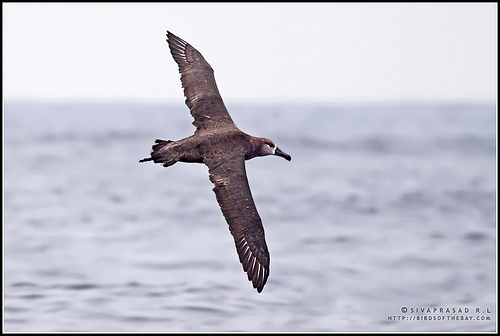

In [105]:
Image.open(filepath)

In [106]:
filepath,box = cub.root + "images/"+ cub.train[0][0], cub.train[0][1]

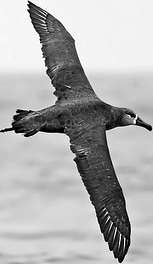

In [107]:
Image.fromarray(m2[box[0]:box[1],box[2]:box[3]])

SyntaxError: invalid syntax (<ipython-input-98-709854a0e9d5>, line 1)

In [92]:
box

[139, 30, 153, 264]

In [30]:
m = np.array(Image.open(filepath))

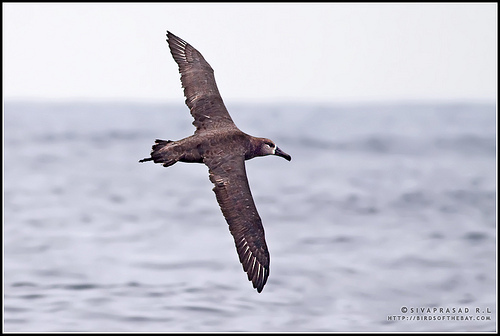

In [68]:
Image.fromarray(m)

In [80]:
m2 = m[:,:,2]

In [81]:
m0 = np.zeros(m2.shape)

In [84]:
m3 = np.stack((m0,m0,m2),axis = 2)

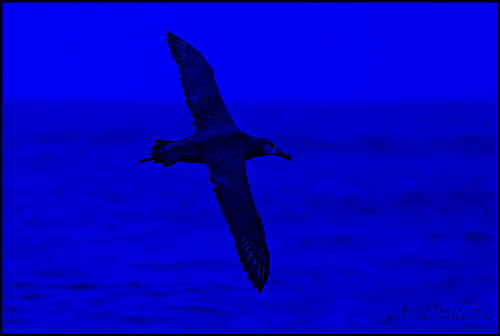

In [85]:
Image.fromarray(m3.astype(np.uint8))

In [67]:
print(type(m3),type(m))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
filepath = "datasets/CUB_200_2011/"
paths_with_col_names = {
    "images.txt": ("image_id", "image_name"),
    "train_test_split.txt": ("image_id", "is_training_image"),
    "image_class_labels.txt": ("image_id", "class_id"),
    "classes.txt": ("class_id", "class_name"),
    "bounding_boxes.txt": ("image_id", "bb_x", "bb_y", "bb_width", "bb_height"),
    "parts/part_locs.txt": ("image_id", "part_id", "p_x", "p_y", "p_visible"),
    "parts/parts.txt": ("part_id", "part_name"),
    "parts/part_click_locs.txt": ("image_id", "part_id", "p_mturk_x", "p_mturk_y", "p_mturk_visible", "p_mturk_time"),
    #"attributes/attributes.txt": ("attribute_id", "attribute_name"),
    #"attributes/certainties.txt": ("certainty_id", "certainty_name"),
    #"attributes/image_attribute_labels.txt": ("image_id", "attribute_id", "att_is_present", "certainty_id", "att_time", "_1", "_2"),
    #"attributes/class_attribute_labels_continuous.txt": ()
}

In [167]:
import pandas as pd
from collections import defaultdict
from functools import reduce

In [183]:
with open(filepath + "attributes/image_attribute_labels.txt", "r") as f:
    x = f.readlines()

In [184]:
pd.DataFrame([i.split() for i in x]).loc[:,5].unique()

KeyboardInterrupt: 

In [ ]:
pd.read_csv(filepath + "attributes/image_attribute_labels.txt", sep=r"(?<=\d)\s")

In [187]:
dataframes = [
    pd.read_csv(filepath + path, sep=r"(?<=\d)\s", names=col_names)
        .set_index([col for col in col_names if col.endswith("_id")])
    for path, col_names in paths.items()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [ ]:
df = reduce(lambda df1, df2: pd.merge(df1, df2, left_index=True, right_index=True), dataframes)

In [ ]:
df